In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
import os

In [10]:
train_cats_dir = '../data/cats_and_dogs_filtered/train/cats/'
train_dogs_dir = '../data/cats_and_dogs_filtered/train/dogs/'
test_cats_dir = '../data/cats_and_dogs_filtered/validation/cats/'
test_dogs_dir = '../data/cats_and_dogs_filtered/validation/dogs/'

In [11]:
train_cat_fname = os.listdir(train_cats_dir)
print('데이터: ', train_cat_fname[:3])
print('train cats 데이터 개수: ', len(train_cat_fname))

train_dog_fname = os.listdir(train_dogs_dir)
print('데이터: ', train_dog_fname[:3])
print('train dogs 데이터 개수: ', len(train_dog_fname))

test_cat_fname = os.listdir(test_cats_dir)
print('데이터: ', test_cat_fname[:3])
print('test cats 데이터 개수: ', len(test_cat_fname))

test_dog_fname = os.listdir(test_dogs_dir)
print('데이터: ', test_dog_fname[:3])
print('test dogs 데이터 개수: ', len(test_dog_fname))


데이터:  ['cat.952.jpg', 'cat.946.jpg', 'cat.6.jpg']
train cats 데이터 개수:  1000
데이터:  ['dog.775.jpg', 'dog.761.jpg', 'dog.991.jpg']
train dogs 데이터 개수:  1000
데이터:  ['cat.2042.jpg', 'cat.2056.jpg', 'cat.2081.jpg']
test cats 데이터 개수:  500
데이터:  ['dog.2266.jpg', 'dog.2272.jpg', 'dog.2299.jpg']
test dogs 데이터 개수:  500


In [14]:
def load_images(default_path, filenames):
    images = []
    for filename in filenames:
        images.append(plt.imread(default_path + filename))
    return np.array(images)

In [15]:
X_train_cats = load_images(train_cats_dir, train_cat_fname)
print(X_train_cats.shape)
X_train_dogs = load_images(train_dogs_dir, train_dog_fname)
print(X_train_dogs.shape)

(1000,)
(1000,)


In [16]:
X_test_cats = load_images(test_cats_dir, test_cat_fname)
print(X_test_cats.shape)
X_test_dogs = load_images(test_dogs_dir, test_dog_fname)
print(X_test_dogs.shape)

(500,)
(500,)


# 이미지 데이터 확인

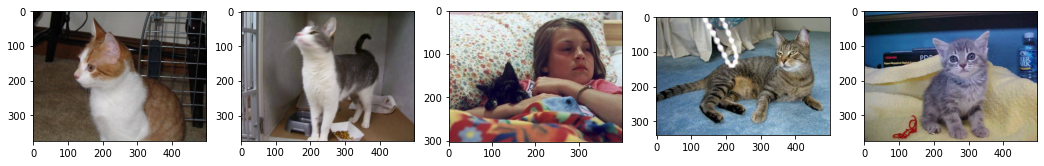

In [17]:
figure, axes = plt.subplots(nrows=1, ncols=5)
figure.set_size_inches(18, 5)

axes[0].imshow(X_train_cats[0])
axes[1].imshow(X_train_cats[1])
axes[2].imshow(X_train_cats[2])
axes[3].imshow(X_train_cats[3])
axes[4].imshow(X_train_cats[4])

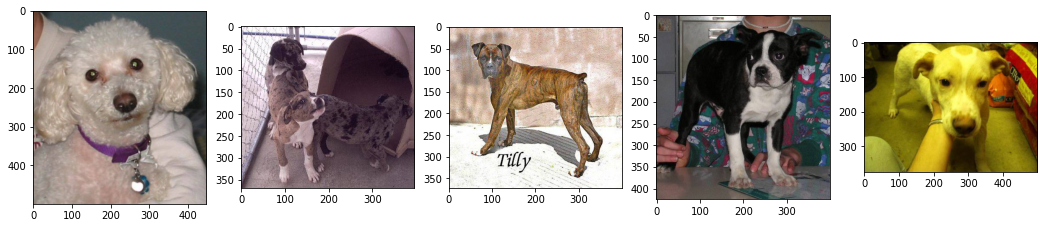

In [18]:
figure, axes = plt.subplots(nrows=1, ncols=5)
figure.set_size_inches(18, 5)

axes[0].imshow(X_train_dogs[0])
axes[1].imshow(X_train_dogs[1])
axes[2].imshow(X_train_dogs[2])
axes[3].imshow(X_train_dogs[3])
axes[4].imshow(X_train_dogs[4])

# 이미지 사이즈 조절

In [19]:
from PIL import Image

In [22]:
def resize_image(original_images, size):
    resize_img = []

    for image in original_images:
        resize = np.array(Image.fromarray(image).resize(size))
        resize_img.append(resize)

    return np.array(resize_img)

In [23]:
X_train_cats_224 = resize_image(X_train_cats, (224, 224))
print(X_train_cats_224.shape)
X_train_dogs_224 = resize_image(X_train_dogs, (224, 224))
print(X_train_dogs.shape)

(1000, 224, 224, 3)
(1000,)


In [24]:
X_test_cats_224 = resize_image(X_test_cats, (224, 224))
print(X_test_cats_224.shape)
X_test_dogs_224 = resize_image(X_test_dogs, (224, 224))
print(X_test_dogs_224.shape)


(500, 224, 224, 3)
(500, 224, 224, 3)


In [25]:
X_train = np.concatenate((X_train_cats_224, X_train_dogs_224))
X_train.shape

(2000, 224, 224, 3)

In [26]:
X_test = np.concatenate((X_test_cats_224, X_test_dogs_224))
X_test.shape

(1000, 224, 224, 3)

In [27]:
y_train = np.array([0] * 1000 + [1] * 1000)
print(y_train[:10])
print(y_train[-10:])
print(y_train.shape)

[0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1]
(2000,)


In [28]:
y_test = np.array([0] * 500 + [1] * 500)
print(y_test[:10])
print(y_test[-10:])
print(y_test.shape)

[0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1]
(1000,)


# CNN

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [31]:
model = Sequential()

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='sigmoid',
                 padding='same', input_shape=(224, 224, 3)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='sigmoid',
                 padding='same'))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='sigmoid',
                 padding='same'))

model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='sigmoid',
                 padding='same'))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())

model.add(Dense(units=128, activation='sigmoid'))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
63/63 [==============================] - ETA: 0s - loss: 2.2089 - accuracy: 0.5010   